In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smartphone-usage-and-behavioral-dataset/mobile_usage_behavioral_analysis.csv


In [2]:
data_df=pd.read_csv('/kaggle/input/smartphone-usage-and-behavioral-dataset/mobile_usage_behavioral_analysis.csv')

In [3]:
data_df.shape

(1000, 10)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Total_App_Usage_Hours         1000 non-null   float64
 4   Daily_Screen_Time_Hours       1000 non-null   float64
 5   Number_of_Apps_Used           1000 non-null   int64  
 6   Social_Media_Usage_Hours      1000 non-null   float64
 7   Productivity_App_Usage_Hours  1000 non-null   float64
 8   Gaming_App_Usage_Hours        1000 non-null   float64
 9   Location                      1000 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 78.2+ KB


In [5]:
data_df.duplicated().sum()

0

In [6]:
data_df.head()

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


Data includes 1000 entry rows with 10 features. There are no missing values or duplicates in the data set.

In [7]:
for i in data_df.columns:
    print(data_df[i].value_counts())
    print('*'*40)

User_ID
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64
****************************************
Age
50    37
43    34
52    32
54    31
45    30
22    29
56    28
41    27
18    27
19    27
42    27
25    27
49    26
53    25
20    25
23    25
40    25
39    24
47    24
34    24
31    24
28    23
29    23
46    23
57    23
32    22
36    21
33    21
21    21
26    21
38    20
55    20
27    20
30    20
59    19
37    19
51    19
58    19
44    18
48    18
35    17
24    15
Name: count, dtype: int64
****************************************
Gender
Male      517
Female    483
Name: count, dtype: int64
****************************************
Total_App_Usage_Hours
7.14     5
3.81     4
10.51    4
2.96     4
6.27     4
        ..
11.58    1
4.67     1
11.95    1
5.16     1
3.99     1
Name: count, Length: 672, dtype: int64
****************************************
Daily_Screen_Time_Hours
8.1

In [8]:
for i in data_df.columns:
    print(i,':',data_df[i].nunique())

User_ID : 1000
Age : 42
Gender : 2
Total_App_Usage_Hours : 672
Daily_Screen_Time_Hours : 705
Number_of_Apps_Used : 27
Social_Media_Usage_Hours : 437
Productivity_App_Usage_Hours : 432
Gaming_App_Usage_Hours : 443
Location : 5


In [9]:
#Drop user ID
data_df.drop('User_ID',axis=1,inplace=True)

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1000 non-null   int64  
 1   Gender                        1000 non-null   object 
 2   Total_App_Usage_Hours         1000 non-null   float64
 3   Daily_Screen_Time_Hours       1000 non-null   float64
 4   Number_of_Apps_Used           1000 non-null   int64  
 5   Social_Media_Usage_Hours      1000 non-null   float64
 6   Productivity_App_Usage_Hours  1000 non-null   float64
 7   Gaming_App_Usage_Hours        1000 non-null   float64
 8   Location                      1000 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 70.4+ KB


In [11]:
numerical_cols = ['Age','Total_App_Usage_Hours','Daily_Screen_Time_Hours','Number_of_Apps_Used','Social_Media_Usage_Hours','Productivity_App_Usage_Hours','Gaming_App_Usage_Hours']
categorical_cols =['Gender','Location']

In [12]:
def plotHistNBoxPlot(col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(0.15,0.85)},figsize=(15,10))
    sns.set(style='darkgrid')
    
    #Add a graph to each part
    sns.boxplot(x=data_df[col],ax=ax_box,showmeans=True)
    sns.distplot(data_df[col],ax=ax_hist)
    ax_hist.axvline(data_df[col].mean(),color='green',linestyle='dashed',linewidth=2)
    ax_hist.axvline(data_df[col].median(),color='orange',linestyle='dashed',linewidth=2)
    plt.show()

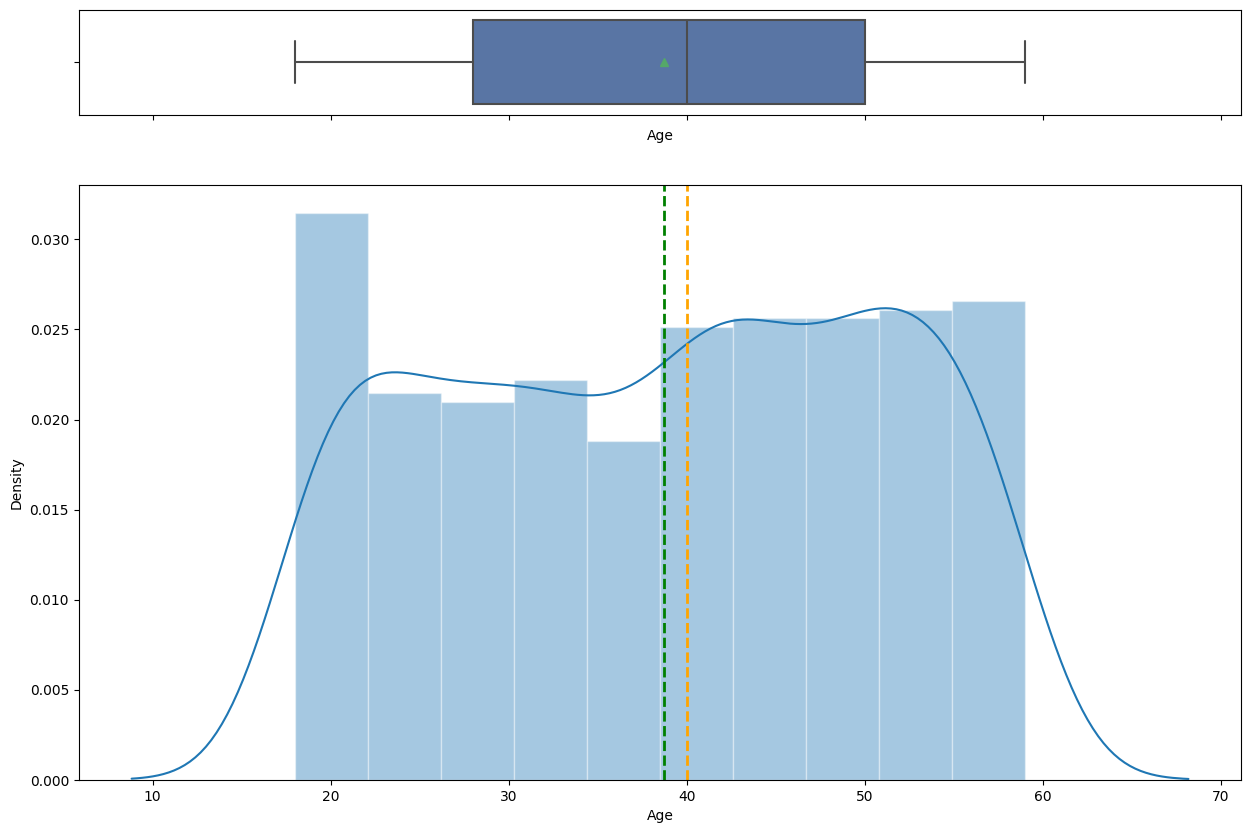

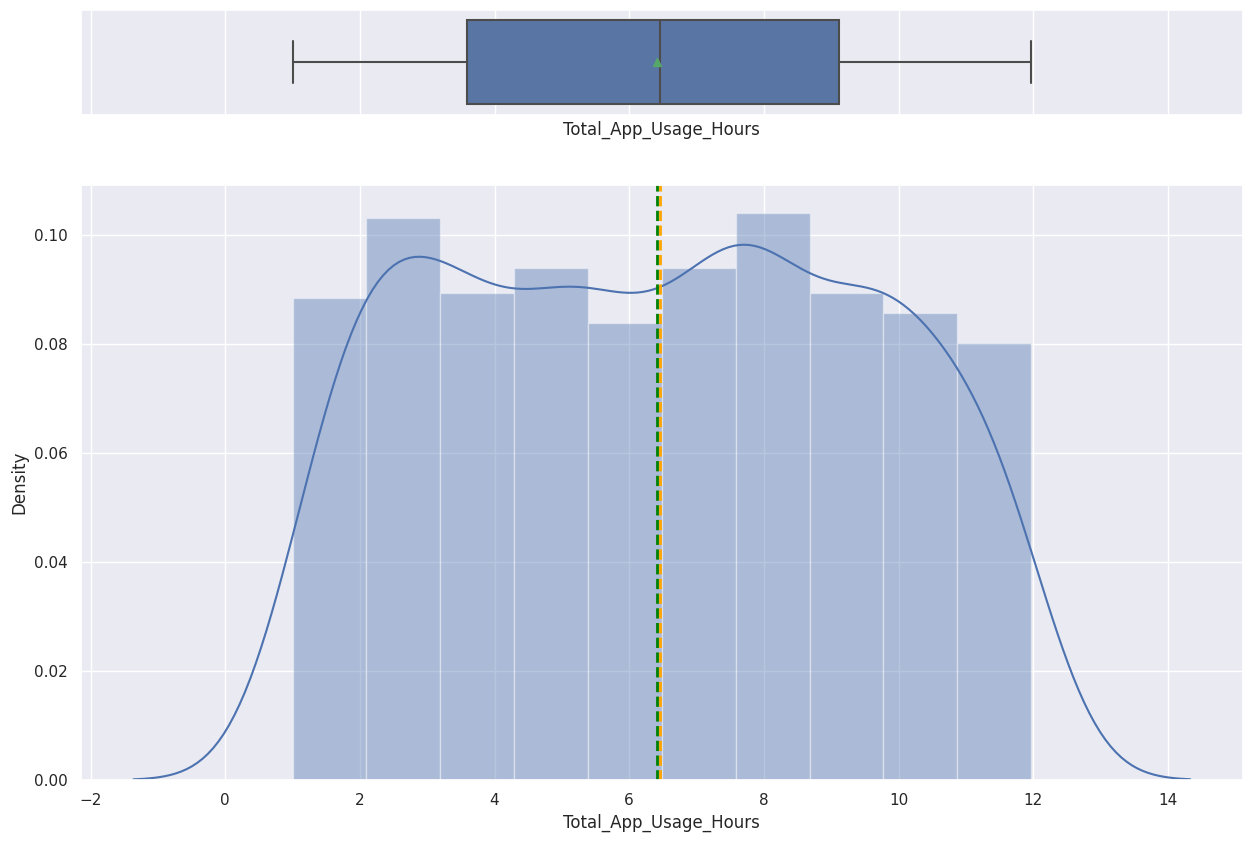

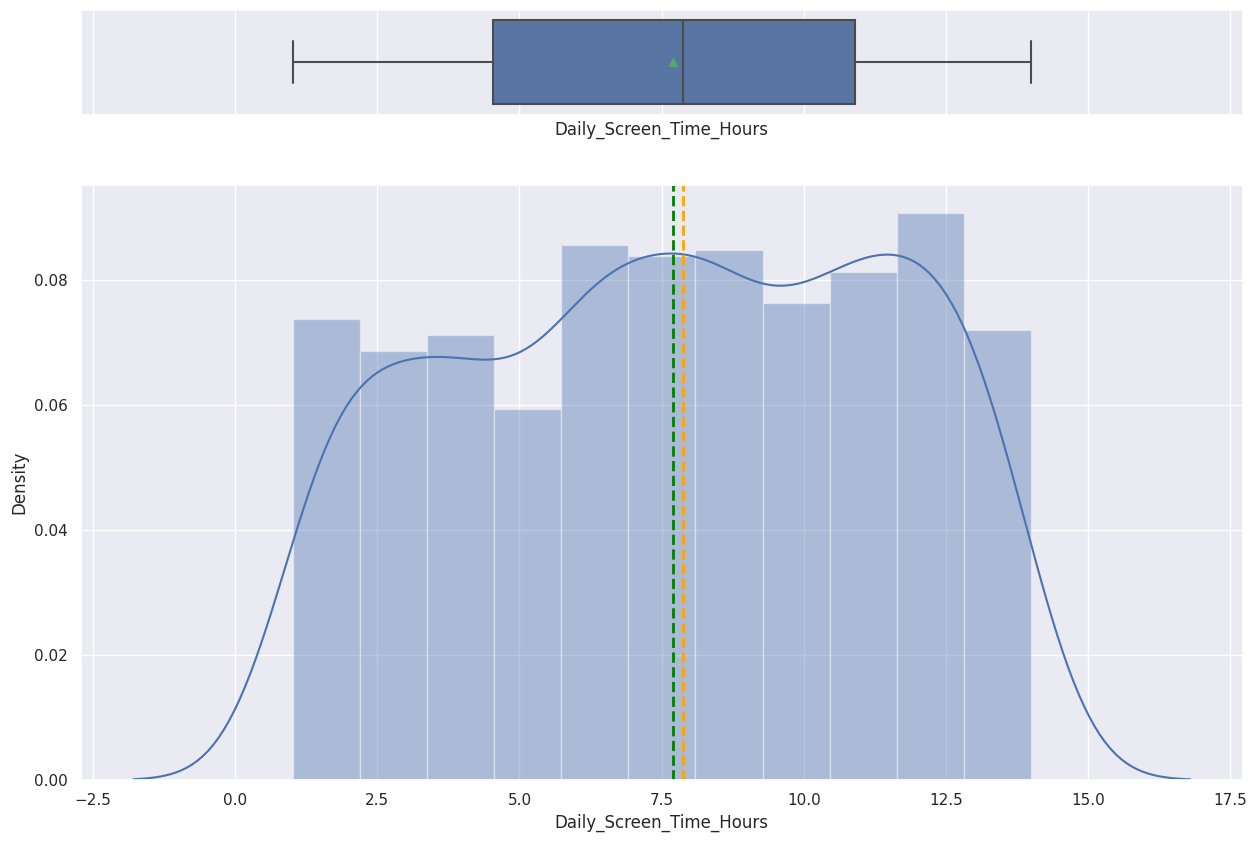

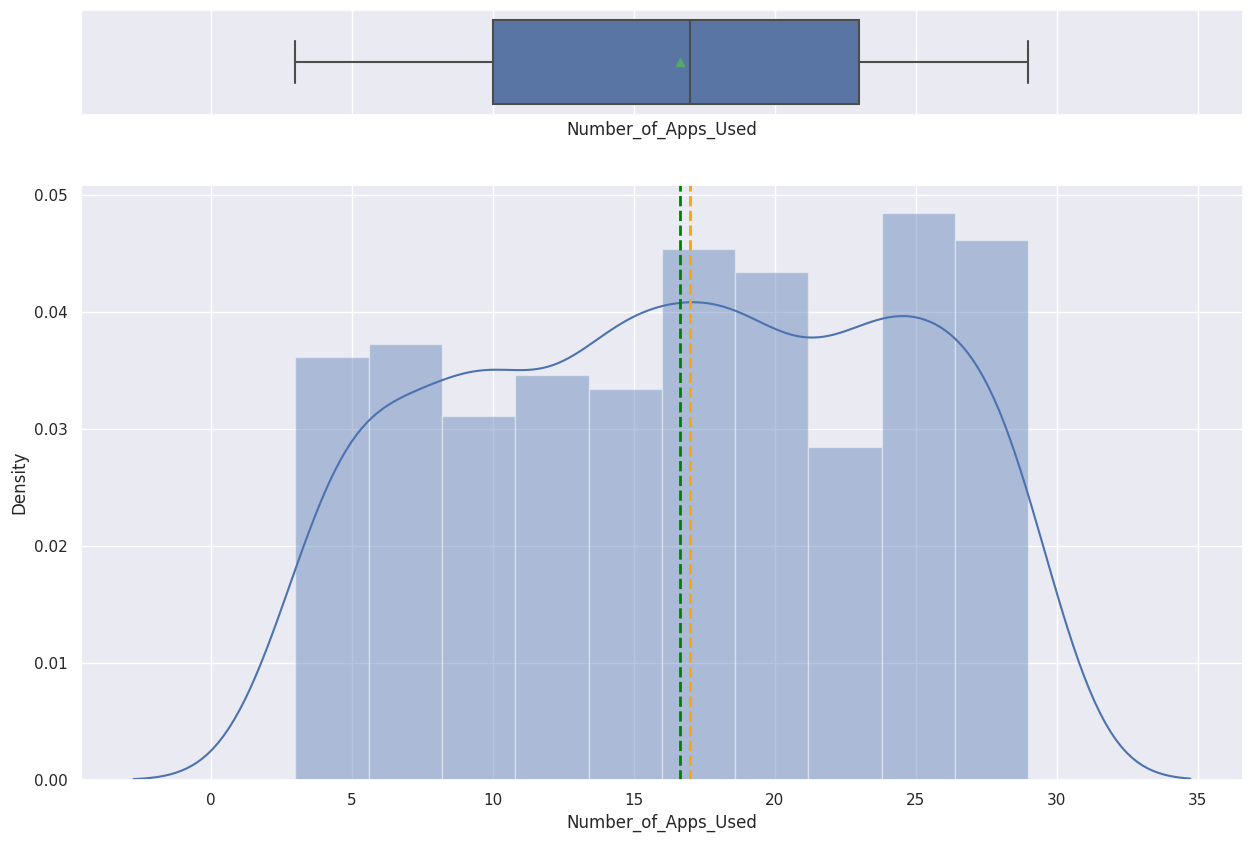

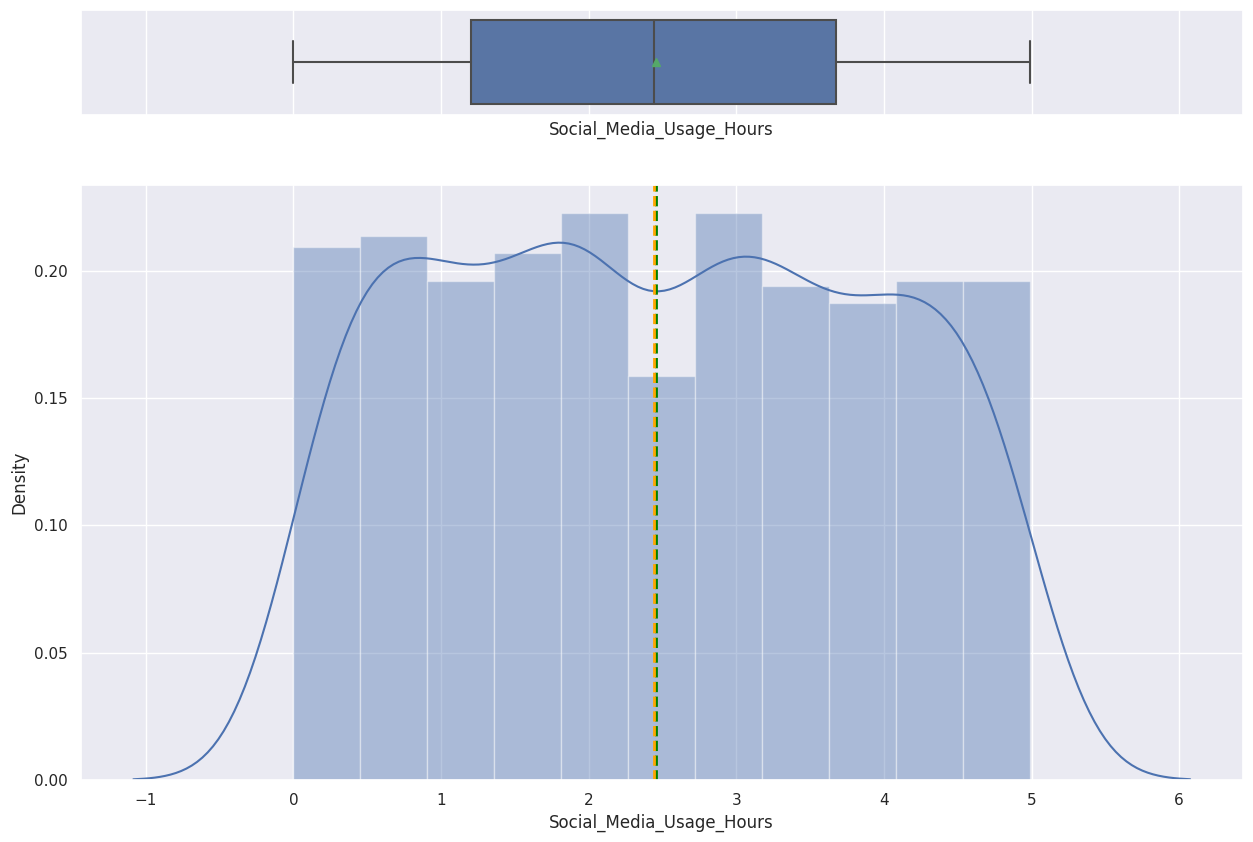

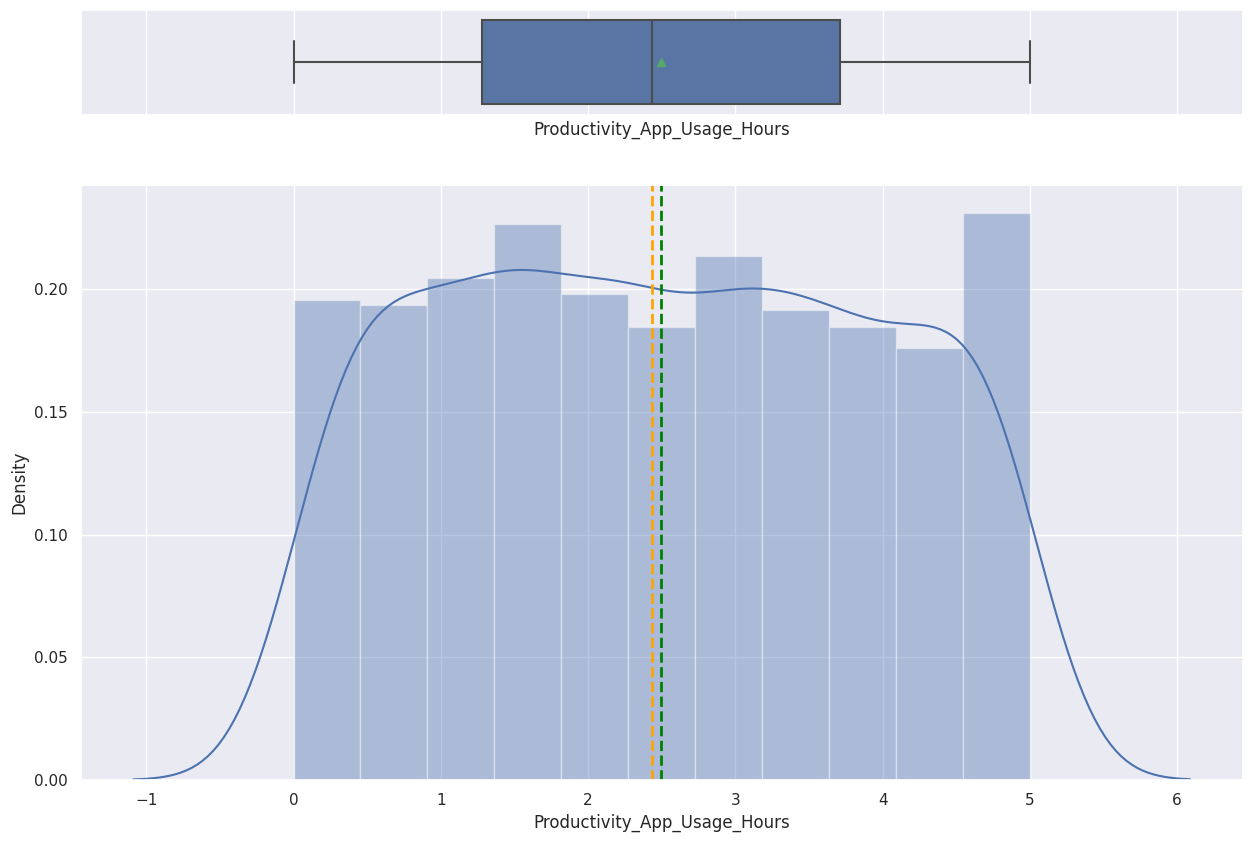

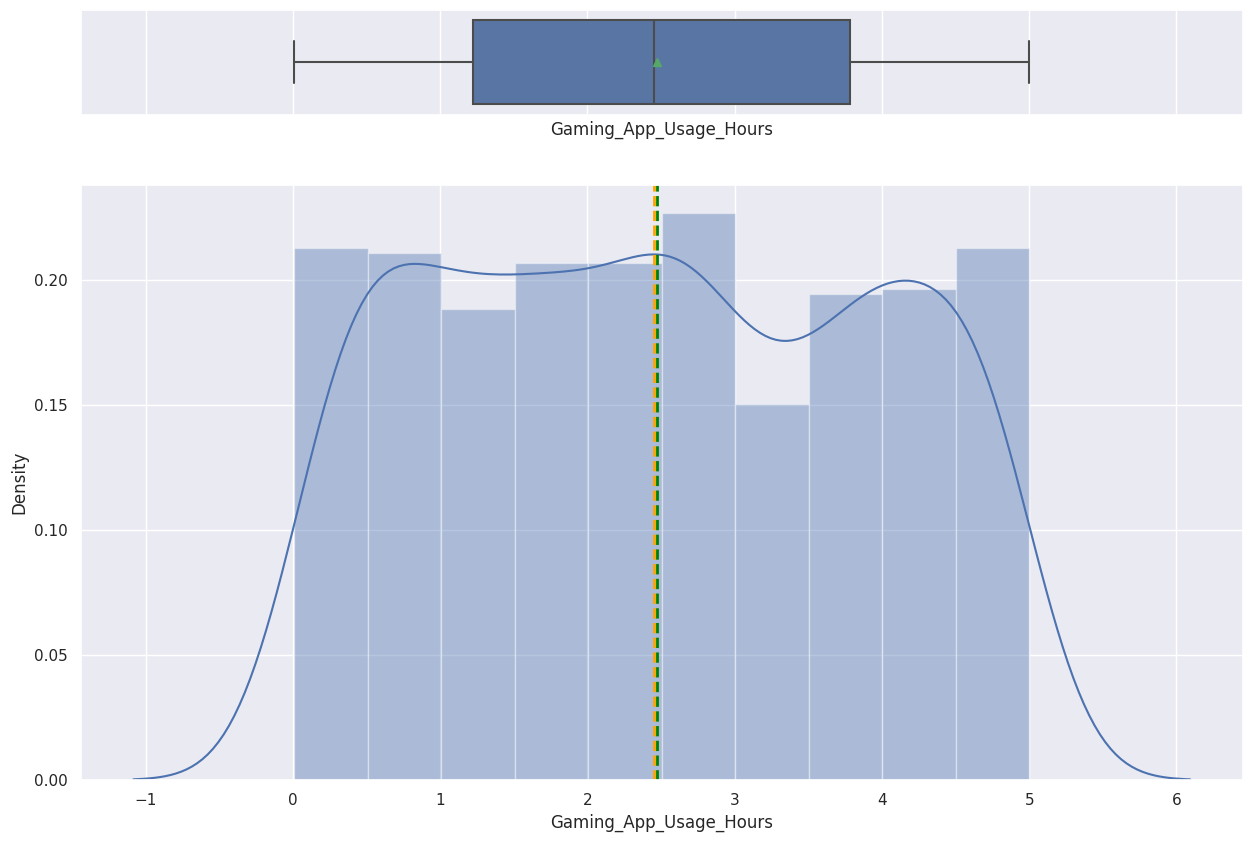

In [13]:
for i in numerical_cols:
    plotHistNBoxPlot(i)

In [15]:
for i in numerical_cols:
    print(i,": Mean",data_df[i].mean())
    print(i,": Median",data_df[i].median())
    print(i,": Max",data_df[i].max())
    print(i,": Min",data_df[i].min())
    print('*'*40)

Age : Mean 38.745
Age : Median 40.0
Age : Max 59
Age : Min 18
****************************************
Total_App_Usage_Hours : Mean 6.40567
Total_App_Usage_Hours : Median 6.455
Total_App_Usage_Hours : Max 11.97
Total_App_Usage_Hours : Min 1.0
****************************************
Daily_Screen_Time_Hours : Mean 7.69631
Daily_Screen_Time_Hours : Median 7.88
Daily_Screen_Time_Hours : Max 14.0
Daily_Screen_Time_Hours : Min 1.01
****************************************
Number_of_Apps_Used : Mean 16.647
Number_of_Apps_Used : Median 17.0
Number_of_Apps_Used : Max 29
Number_of_Apps_Used : Min 3
****************************************
Social_Media_Usage_Hours : Mean 2.45633
Social_Media_Usage_Hours : Median 2.4450000000000003
Social_Media_Usage_Hours : Max 4.99
Social_Media_Usage_Hours : Min 0.0
****************************************
Productivity_App_Usage_Hours : Mean 2.4952699999999997
Productivity_App_Usage_Hours : Median 2.435
Productivity_App_Usage_Hours : Max 5.0
Productivity_App_Us

Observations:
1. User age ranges from 18 to 59. Mean and median are well matched at 38.7 and 40 years of age
2. Total app usage hours ranges from 1 hour to 12 hours with mean use around 6.4 hours
3. Daily screen time is similar ranging from 1 to 14 hours with mean screen time around 7.7 hours
4. Number of apps used has a minimum of 3 and a maximum of 29. The mean is 16.6
5. Social media usage, productivity app usage and gaming app usage hours range from 0 to 5 hours. The mean is 2.5 hours